In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns




In [6]:
# Load the data
df = pd.read_csv(r"C:\Users\Swati\Downloads\archive.zip")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
# Basic data exploration
print("Dataset Shape:", df.shape)
print("\nClass distribution:")
print(df['Class'].value_counts(normalize=True))


Dataset Shape: (284807, 31)

Class distribution:
Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


In [8]:
# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


C:\Users\Swati\AppData\Local\Temp\ipykernel_18268\120926322.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values[:10], y=correlations.index[:10], palette="rocket")


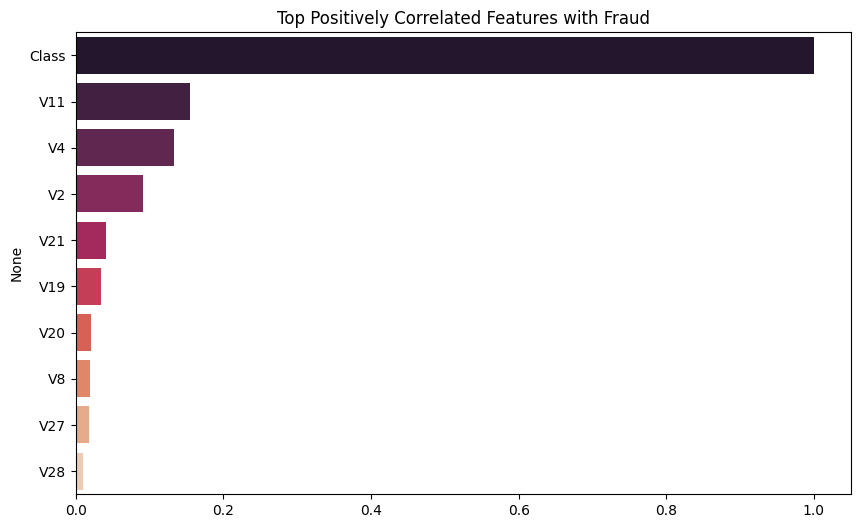

C:\Users\Swati\AppData\Local\Temp\ipykernel_18268\120926322.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values[-10:], y=correlations.index[-10:], palette="coolwarm")


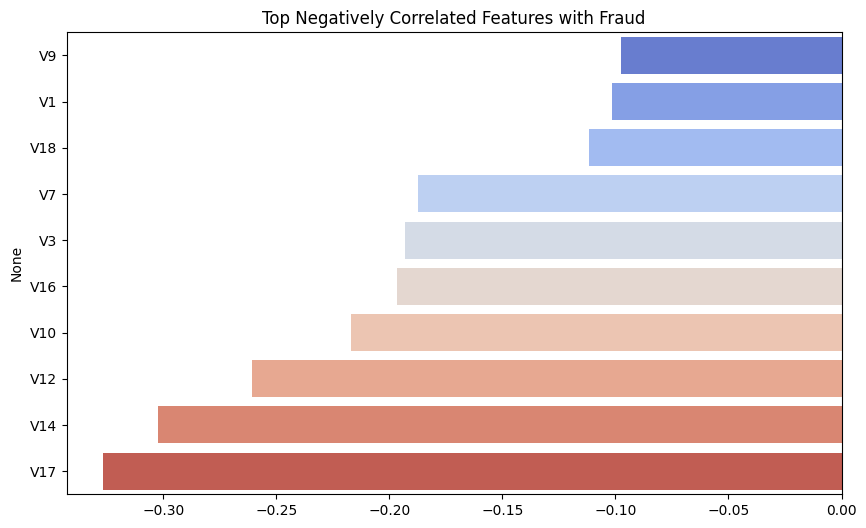

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


correlations = df.corr()["Class"].sort_values(ascending=False)

# Plot top and bottom features
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values[:10], y=correlations.index[:10], palette="rocket")
plt.title("Top Positively Correlated Features with Fraud")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values[-10:], y=correlations.index[-10:], palette="coolwarm")
plt.title("Top Negatively Correlated Features with Fraud")
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    average_precision_score,
    precision_recall_curve
)
import matplotlib.pyplot as plt

# Define features and target
X = df.drop("Class", axis=1)
y = df["Class"]

# Stratified split ensures class ratio (fraud vs. legit) is preserved
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [32]:
# Logistic Regression with class_weight='balanced'
clf = LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear')
clf.fit(X_train, y_train)

# Predict probabilities and class labels
proba = clf.predict_proba(X_val)[:, 1]
preds = clf.predict(X_val)

PR-AUC Score: 0.7153
              precision    recall  f1-score   support

           0     0.9999    0.9757    0.9876     56864
           1     0.0612    0.9184    0.1148        98

    accuracy                         0.9756     56962
   macro avg     0.5305    0.9470    0.5512     56962
weighted avg     0.9982    0.9756    0.9861     56962



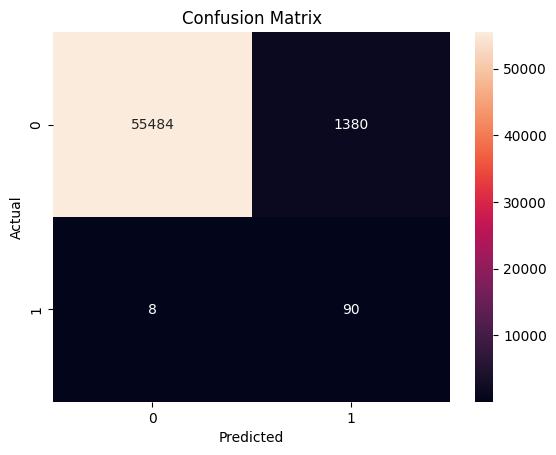

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# PR-AUC
pr_auc = average_precision_score(y_val, proba)
print("PR-AUC Score:", round(pr_auc, 4))

# Classification Report
print(classification_report(y_val, preds, digits=4))

# Confusion Matrix
cm = confusion_matrix(y_val, preds)
sns.heatmap(cm, annot=True, fmt="d", cmap="rocket")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

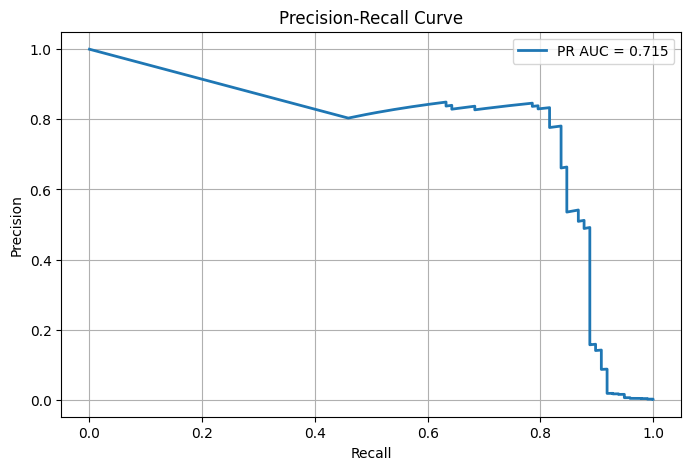

In [34]:
precision, recall, thresholds = precision_recall_curve(y_val, proba)

plt.figure(figsize=(8, 5))
plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.3f}", linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Print model performance
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



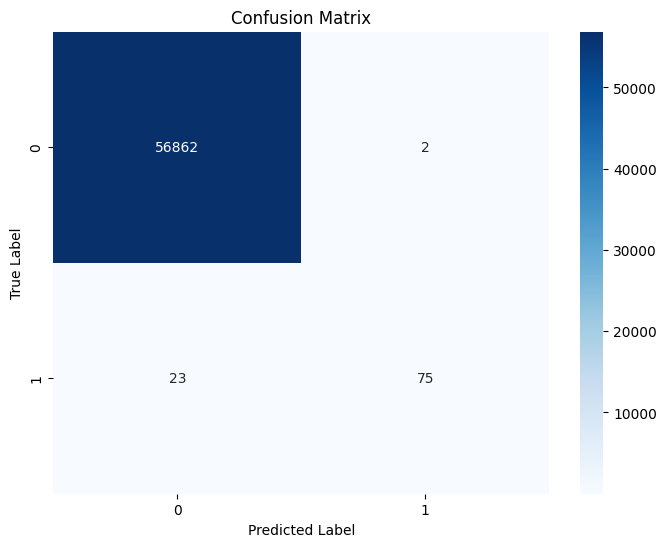

In [9]:
# Create confusion matrix visualization
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [35]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd

In [36]:
df = pd.read_csv(r"C:\Users\Swati\Downloads\archive.zip")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [18]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# creditcard.csv has 284807 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv(r"C:\Users\Swati\Downloads\archive.zip", delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'creditcard.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 31 columns


In [19]:
df1.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


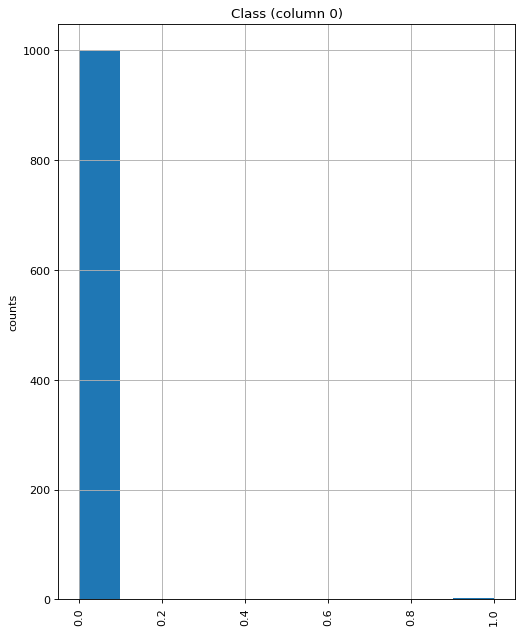

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df.columns if nunique[col] > 1 and nunique[col] < 50]]

    nRow, nCol = df.shape
    columnNames = list(df.columns)
    

    nGraphRow = int(np.ceil(nCol / nGraphPerRow))

    # Handle case where no suitable columns are found
    if nCol == 0:
        print("No suitable columns found to plot based on unique value criteria (1 < unique values < 50).")
        return

    plt.figure(num=None,
               figsize=(6 * nGraphPerRow, 8 * nGraphRow),
               dpi=80, facecolor='w',
               edgecolor='k')

    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]

        # Use pd.api.types.is_numeric_dtype for robust type checking
        if (not pd.api.types.is_numeric_dtype(columnDf)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()

        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')

    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

    
plotPerColumnDistribution(df1, 10,5)

<Figure size 640x640 with 0 Axes>

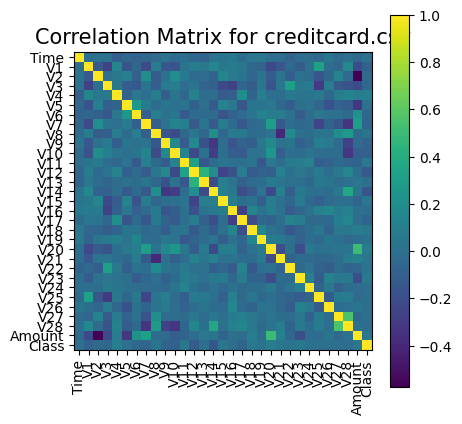

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plotCorrelationMatrix(df, graphWidth):
    filename = getattr(df, 'dataframeName', 'DataFrame')

    
    df = df.dropna(axis='columns')

    
    df = df[[col for col in df.columns if df[col].nunique() > 1]]

    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return

    # Calculate correlation, focusing only on numeric types for robustness
    corr = df.corr(numeric_only=True)

    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')

    # FIX: Removed fignum=1 from plt.matshow to avoid potential ValueErrors
    # It will use the current figure created by plt.figure()
    corrMat = plt.matshow(corr)

    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)

    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)

    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


plotCorrelationMatrix(df1, 8)

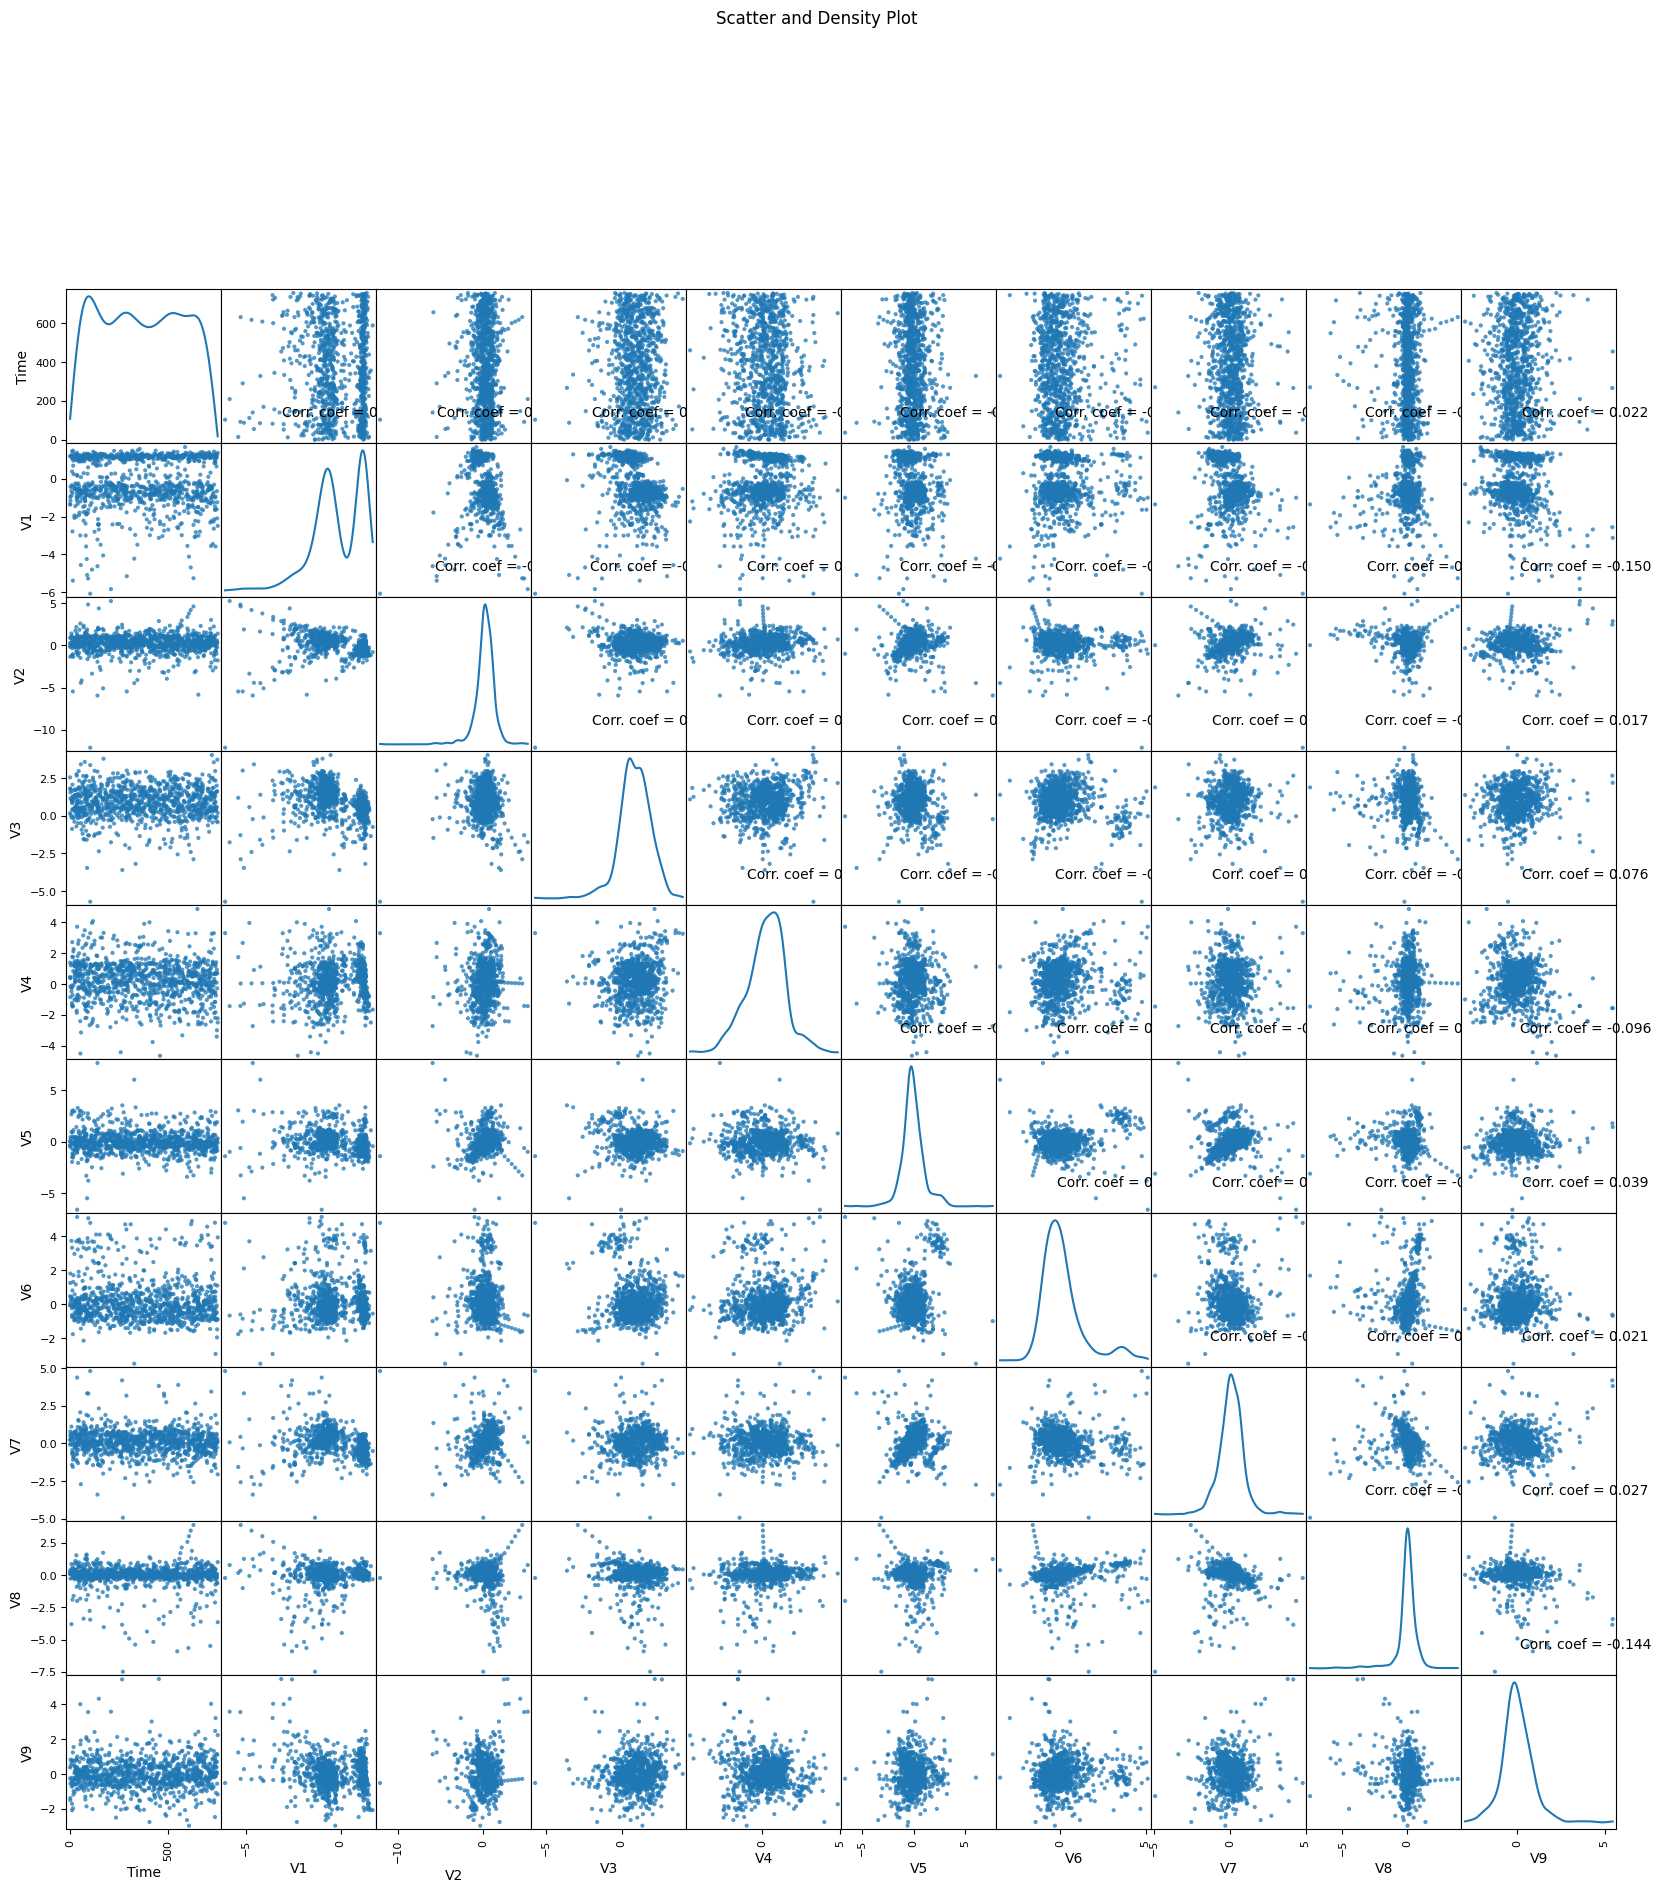

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include=[np.number]) 

    
    df = df.dropna(axis='columns')

    df = df[[col for col in df.columns if df[col].nunique() > 1]] 
    
    columnNames = list(df.columns) 
    
    
    if len(columnNames) < 2:
        print(f"Not enough suitable numerical columns (after filtering NaNs and unique values) to create a scatter matrix. Found: {len(columnNames)}")
        return

    if len(columnNames) > 10: 
        columnNames = columnNames[:10]
        
        df = df[columnNames] 

    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    
    
    corrs = df.corr(numeric_only=True).values 
    
    
    for i, j in zip(*np.triu_indices_from(ax, k=1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    
    plt.suptitle('Scatter and Density Plot', y=1.02) # Adjust y to prevent title overlap
    plt.show()




plotScatterMatrix(df1, 20, 10)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Style for plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
# Load the data
df = pd.read_csv(r"C:\Users\Swati\Downloads\archive.zip")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

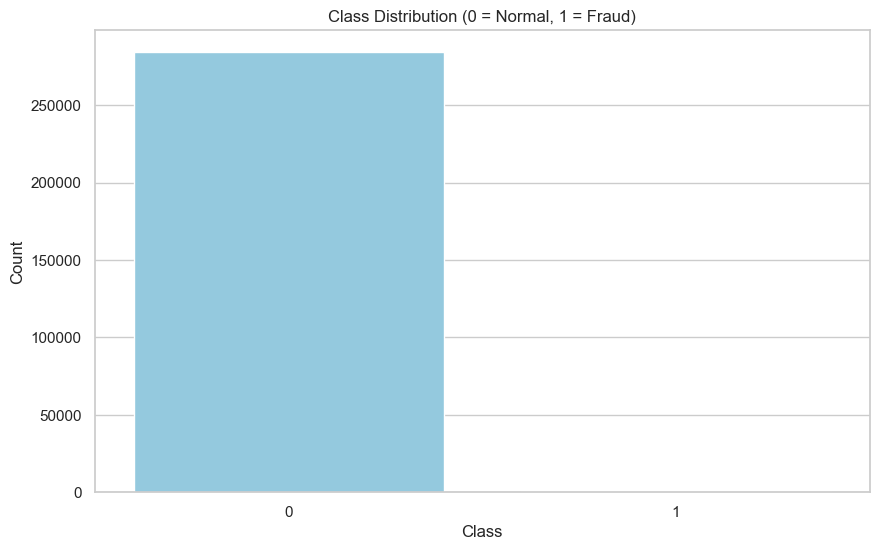

Fraudulent transactions: 0.1727%


In [5]:
df['Class'] = df['Class'].astype(int)  # ensure column is int

sns.countplot(x='Class', hue='Class', data=df, palette={0: 'skyblue', 1: 'red'}, legend=False)
plt.title("Class Distribution (0 = Normal, 1 = Fraud)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

fraud_ratio = df['Class'].value_counts(normalize=True)[1] * 100
print(f"Fraudulent transactions: {fraud_ratio:.4f}%")

In [6]:
# from sklearn.preprocessing import StandardScaler


# X = df.drop(columns=['Class'])
# y = df['Class']


# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# X_scaled

from sklearn.preprocessing import StandardScaler
import joblib

# Refit the scaler
scaler = StandardScaler()
X = df.drop(columns=['Class'])
X_scaled = scaler.fit_transform(X)

# Save only the SCALER object, not the scaled data
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [7]:
# import joblib

# joblib.dump(scaler, 'scaler.pkl')  

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)  # reduce to 10 principal components
X_pca_reduced = pca.fit_transform(X_scaled)

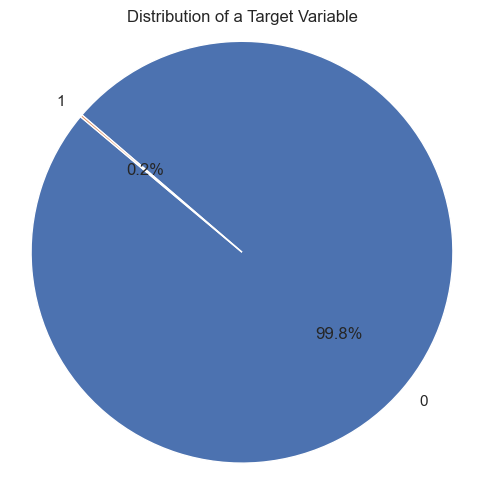

In [9]:
counts = df.Class.value_counts()


plt.figure(figsize=(5, 5))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', 
        startangle=140)

plt.title('Distribution of a Target Variable')
plt.axis('equal')  

plt.tight_layout()
plt.show()


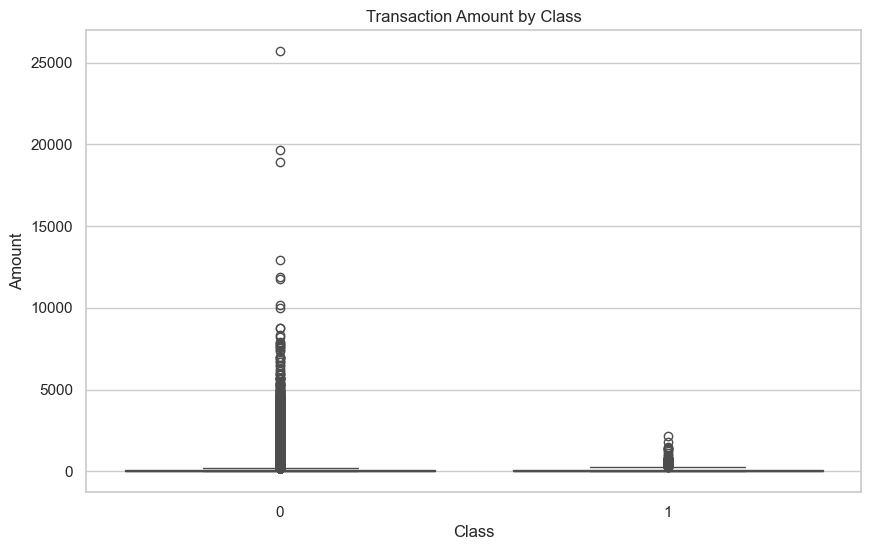

In [10]:
df['Class'] = df['Class'].astype(int)

sns.boxplot(x='Class', y='Amount', hue='Class', data=df,
            palette={0: 'lightgreen', 1: 'orangered'}, legend=False)

plt.title("Transaction Amount by Class")
plt.xlabel("Class")
plt.ylabel("Amount")
plt.show()

Top 10 features most correlated with Class:
 Class    1.000000
V17      0.326481
V14      0.302544
V12      0.260593
V10      0.216883
V16      0.196539
V3       0.192961
V7       0.187257
V11      0.154876
V4       0.133447
Name: Class, dtype: float64


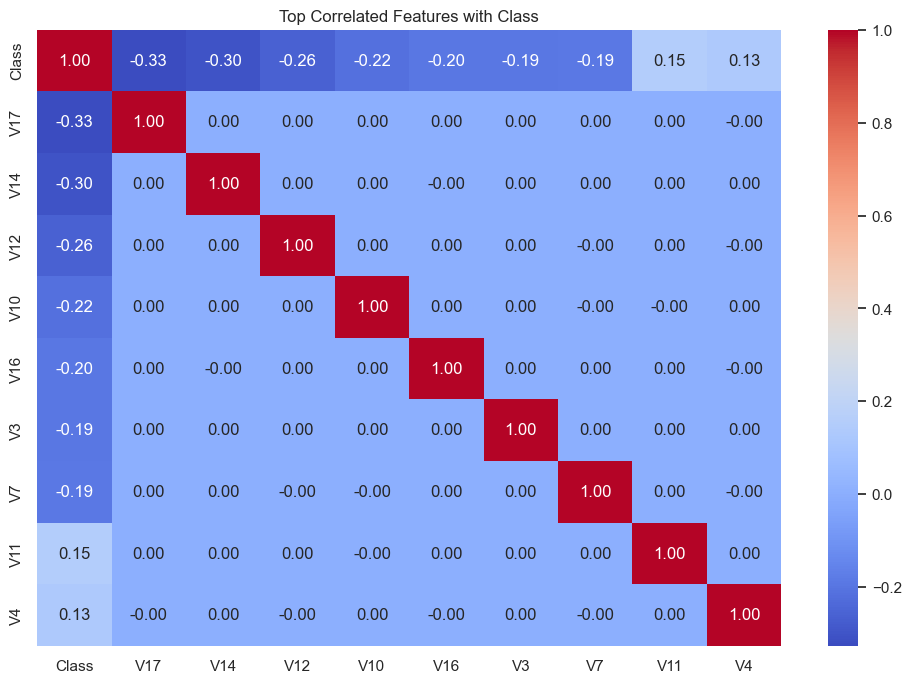

In [11]:
corr = df.corr()

top_corr = corr['Class'].abs().sort_values(ascending=False).head(10)

print("Top 10 features most correlated with Class:\n", top_corr)

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr[top_corr.index].loc[top_corr.index], annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Top Correlated Features with Class")
plt.show()

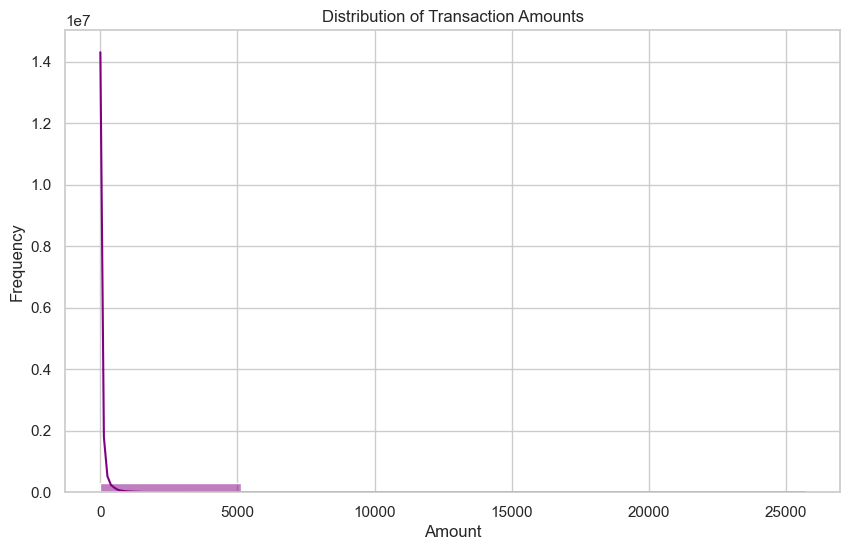

In [12]:
sns.histplot(df['Amount'], bins=5, color='purple', kde=True)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

X_sample, _, = train_test_split(X_pca_reduced, train_size=10000, random_state=42)

In [14]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

eps_values = [1.5, 1.8, 2.0, 2.2, 2.4]
min_samples_values = [3, 5, 7]

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X_sample)

        score = silhouette_score(X_sample, labels) if len(set(labels)) > 1 else -1
        noise = np.sum(labels == -1)
        clusters = len(set(labels)) - (1 if -1 in labels else 0)

        print(f"eps={eps}, min_samples={min_samples} → Clusters: {clusters}, Noise: {noise}, Silhouette: {score:.4f}")

eps=1.5, min_samples=3 → Clusters: 21, Noise: 1013, Silhouette: -0.0105
eps=1.5, min_samples=5 → Clusters: 7, Noise: 1179, Silhouette: 0.0754
eps=1.5, min_samples=7 → Clusters: 4, Noise: 1297, Silhouette: 0.1710
eps=1.8, min_samples=3 → Clusters: 12, Noise: 589, Silhouette: 0.0304
eps=1.8, min_samples=5 → Clusters: 2, Noise: 677, Silhouette: 0.3024
eps=1.8, min_samples=7 → Clusters: 1, Noise: 734, Silhouette: 0.4232
eps=2.0, min_samples=3 → Clusters: 10, Noise: 434, Silhouette: 0.1715
eps=2.0, min_samples=5 → Clusters: 2, Noise: 478, Silhouette: 0.3041
eps=2.0, min_samples=7 → Clusters: 2, Noise: 517, Silhouette: 0.2978
eps=2.2, min_samples=3 → Clusters: 5, Noise: 323, Silhouette: 0.2933
eps=2.2, min_samples=5 → Clusters: 3, Noise: 363, Silhouette: 0.2935
eps=2.2, min_samples=7 → Clusters: 2, Noise: 388, Silhouette: 0.3057
eps=2.4, min_samples=3 → Clusters: 4, Noise: 248, Silhouette: 0.4416
eps=2.4, min_samples=5 → Clusters: 1, Noise: 275, Silhouette: 0.5744
eps=2.4, min_samples=7 → Cl

In [15]:
from sklearn.model_selection import train_test_split

X_final_sample, _,y_final_sample,_= train_test_split(X_pca_reduced, df['Class'], train_size=50000, random_state=42)

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import joblib

df = pd.read_csv(r"C:\Users\Swati\Downloads\archive.zip")

# Refit the scaler
scaler = StandardScaler()
X = df.drop(columns=['Class'])
X_scaled = scaler.fit_transform(X)

# Save only the SCALER object, not the scaled data
joblib.dump(scaler, 'scaler.pkl')

# First apply PCA to the scaled data
pca = PCA(n_components=10, random_state=42)
X_pca_reduced = pca.fit_transform(X_scaled)

# Then split into training and test samples
X_final_sample, _, y_final_sample, _ = train_test_split(
    X_pca_reduced, df['Class'], train_size=50000, random_state=42
)

# Run DBSCAN on the reduced and sampled data
db_final = DBSCAN(eps=2.2, min_samples=5)
labels_final = db_final.fit_predict(X_final_sample)

# Optionally evaluate clustering performance
if len(set(labels_final)) > 1:
    score = silhouette_score(X_final_sample, labels_final)
    print(f"Silhouette Score: {score:.4f}")
else:
    print("Only one cluster found. Silhouette Score not applicable.")

Silhouette Score: 0.3223


In [16]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
db_final = DBSCAN(eps=2.2, min_samples=5)
labels_final = db_final.fit_predict(X_final_sample)

In [17]:
new_df=pd.DataFrame(X_final_sample)
new_df["Clusters"]=labels_final
print("Unique clusters found by DBSCAN:", np.unique(labels_final))

Unique clusters found by DBSCAN: [-1  0  1  2  3  4  5  6  7  8]


In [18]:
# Count how many points per cluster
cluster_counts = new_df.value_counts()
print("Points per cluster:\n", cluster_counts)

# How many are anomalies?
n_anomalies = (new_df['Clusters'] == -1).sum()
print(f"Total anomalies (cluster = -1): {n_anomalies}")

Points per cluster:
 0           1          2          3          4          5          6           7          8           9           Clusters
-0.320712   -0.573226   0.383399   1.225751  -1.533316   1.302779  -0.526010   -2.153081   1.890586    2.045472    0          5
-0.529327    1.635185   0.404442   0.106103   1.008189   0.595170   0.491800    0.807667  -0.053916   -0.281665    0          3
-0.360039   -0.105620   0.898992   0.197412  -1.177377  -4.031492  -5.056236    2.392735  -4.944974    2.853322    3          2
-0.425369    1.455955   0.466801   0.559700   0.992761   0.660883   0.532158    0.088929  -0.183129    0.332270    0          2
-0.646452    2.107164  -0.414400   0.156635   1.233484   1.274843   0.640911   -0.035780   0.307581   -0.548847    0          2
                                                                                                                             ..
 41.363921   3.250930  -0.317858  -5.975132   5.698725   9.155665   10.283480   6.651932

C:\Users\Swati\AppData\Local\Temp\ipykernel_7380\2983878810.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Anomaly', data=new_df, palette={'Normal': 'blue', 'Anomaly': 'red'})


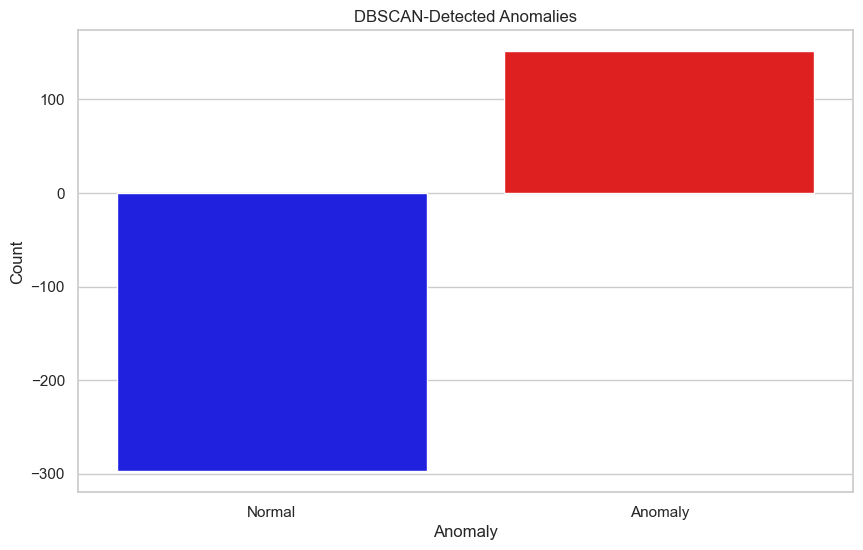

In [19]:
# Create a new column to label anomalies
new_df['Anomaly'] = new_df['Clusters'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')

# View anomaly distribution
sns.countplot(x='Anomaly', data=new_df, palette={'Normal': 'blue', 'Anomaly': 'red'})
plt.title("DBSCAN-Detected Anomalies")
plt.ylabel("Count")
plt.show()

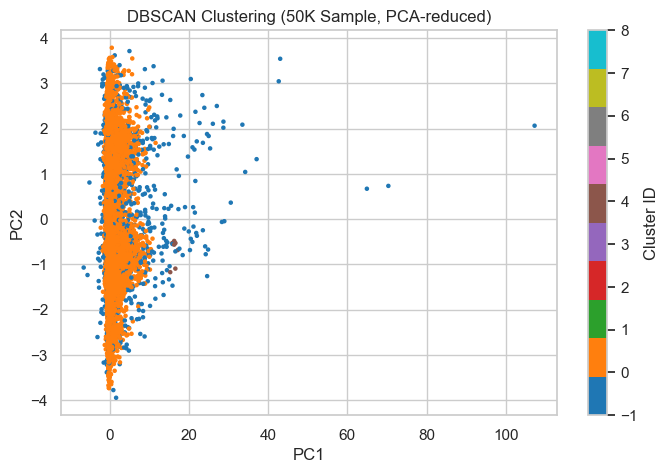

In [20]:
from sklearn.decomposition import PCA

pca_vis = PCA(n_components=2)
X_pca_2d = pca_vis.fit_transform(X_final_sample)  # Use PCA-10 version as input

plt.figure(figsize=(8,5))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=labels_final, cmap='tab10', s=5)
plt.title("DBSCAN Clustering (50K Sample, PCA-reduced)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Cluster ID')
plt.grid(True)
plt.show()

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_final_sample)

# Add PCA results to the original DataFrame
new_df['PCA1'] = pca_result[:, 0]
new_df['PCA2'] = pca_result[:, 1]

# Check explained variance
print(f"PCA Explained Variance Ratio: {pca.explained_variance_ratio_}")

PCA Explained Variance Ratio: [0.18571986 0.14157857]


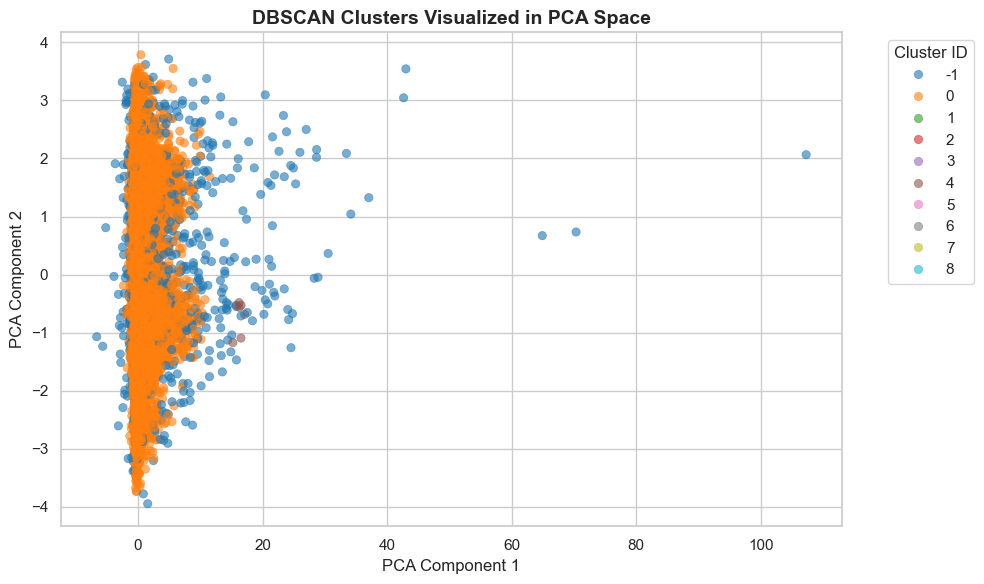

In [22]:
# Visualize cluster distribution
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='Clusters',
    data=new_df,
    palette='tab10',
    alpha=0.6,
    edgecolor=None,
    legend='full'
)
plt.title("DBSCAN Clusters Visualized in PCA Space", fontsize=14, weight='bold')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

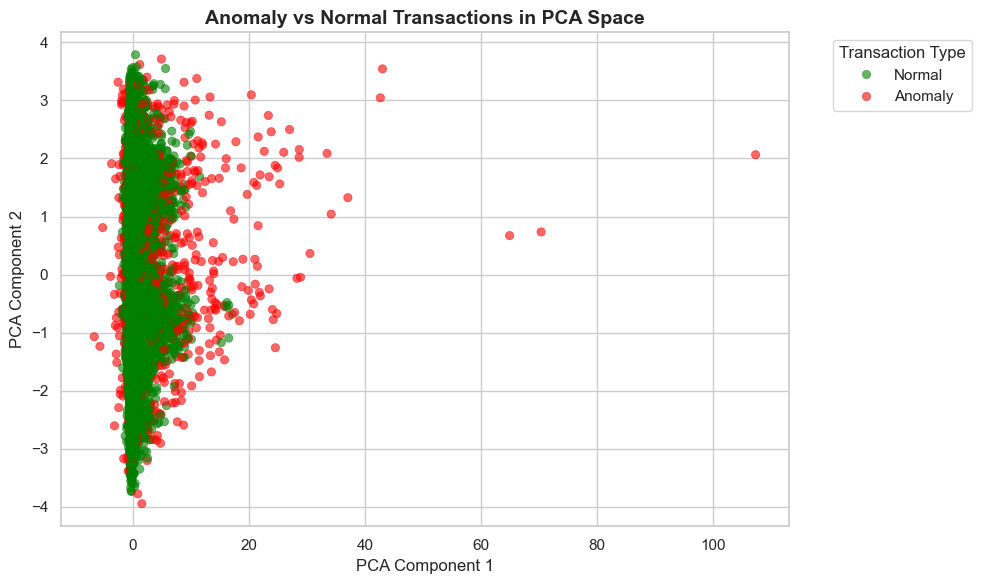

In [23]:
# Highlight anomalies in red and normal in green
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='Anomaly',
    data=new_df,
    palette={'Normal': 'green', 'Anomaly': 'red'},
    alpha=0.6,
    edgecolor=None
)
plt.title("Anomaly vs Normal Transactions in PCA Space", fontsize=14, weight='bold')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Transaction Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [24]:
from sklearn.metrics import silhouette_score
import numpy as np

sample_indices = np.random.choice(len(X_final_sample), size=5000, replace=False)
X_sample = X_final_sample[sample_indices]
labels_sample = labels_final[sample_indices]

n_clusters = len(set(labels_sample)) - (1 if -1 in labels_sample else 0)
silhouette = silhouette_score(X_sample, labels_sample) if n_clusters > 1 else -1
noise_count = np.sum(labels_sample == -1)

# Final Output
print(f"Sampled 5000 points from 50K PCA-reduced set:")
print(f"Clusters found: {n_clusters}")
print(f"Noise points in sample: {noise_count}")
print(f"Silhouette Score: {silhouette:.4f}")

Sampled 5000 points from 50K PCA-reduced set:
Clusters found: 6
Noise points in sample: 99
Silhouette Score: 0.3601


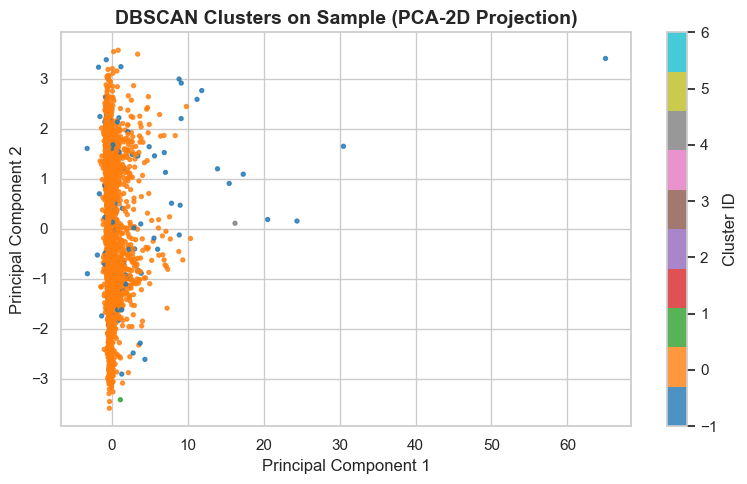

In [25]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce 10D PCA sample to 2D for visualization
X_pca_sample_2D = PCA(n_components=2).fit_transform(X_sample)

# Plot the clusters
plt.figure(figsize=(8, 5))
plt.scatter(X_pca_sample_2D[:, 0], X_pca_sample_2D[:, 1], c=labels_sample, cmap='tab10', s=8, alpha=0.8)
plt.title("DBSCAN Clusters on Sample (PCA-2D Projection)", fontsize=14, weight='bold')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.colorbar(label='Cluster ID')
plt.tight_layout()
plt.savefig("dbscan_sample_clusters.png", dpi=300)
plt.show()

In [26]:
print(f"Clusters: {n_clusters}, Noise points: {noise_count}, Silhouette: {silhouette:.4f}")

Clusters: 6, Noise points: 99, Silhouette: 0.3601


In [27]:
# Predicted: if cluster = -1, we assume it might be fraud
new_df['Predicted_Fraud'] = new_df['Clusters'].apply(lambda x: 1 if x == -1 else 0)

In [29]:
y_pred = np.where(X_final_sample == -1, 1, 0)
y_pred.shape

(50000, 10)